#### Половников Никита

# Распределение Стьдента (t-расределение)

In [113]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import statistics 
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Для выбранного распределения сгенерируйте выборки разного объема и проиллюстрируйте сходимость выборочного среднего к математическому ожиданию (покажите наглядно стабилизацию выборочного среднего).

***Мат. ожидание распределения Сьюдента по определению равна 0, следовательно необходимо добиваться сходимости выборочного средннего к 0.***

$$\mathbb{E}_{Student} \stackrel{def}{=} 0$$

***Очевидно, что в зависимости от количества степеней свободы, скорость сходимости будет меняться. Для лучшей визуализации результата зафиксируем:*** $$d.o.f = 10$$

[-1.1037547303997406, -0.010010036221599117, 0.2400053108643943, -0.019031495438428116, 0.0015237866226993847, -0.0005746458807088258, -0.00047323786588648783]


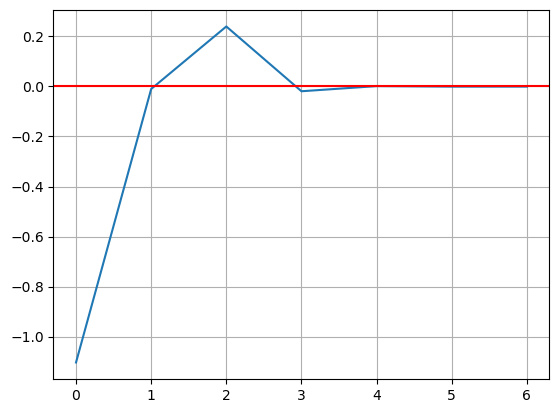

In [2]:
t = sps.t(10)

mean_arr = []

for i in [1,10,100,1000, 10000, 100000, 1000000]:
    temp = t.rvs(size=i).mean()
    mean_arr.append(temp)
    
print(mean_arr)
plt.plot(mean_arr)
plt.grid()
# plt.plot(np.linspace(0,6), np.linspace(0,0))
plt.axhline(0, color='red')

***Как можно заметить, с увеличением размера выборки, выборочное среднее начинает все больше походить на мат. ожидание.***

### 2. Наглядно продемонстрируйте центральную предельную теорему в действии для выбранного вами распределения (покажите сходимость с ростом выборки к нормальному распределению).

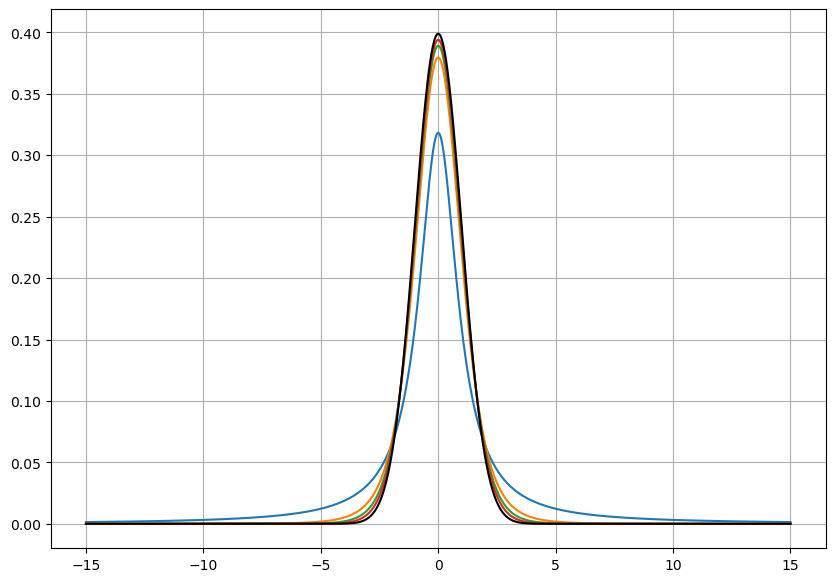

In [3]:
plt.figure(figsize=(10, 7))

x = np.linspace(-15,15,1000)

norm = sps.norm(0,1)
norm_pdf = norm.pdf(x)

for i in [1,5,10,20]:
    t = sps.t(i)
    pdf = t.pdf(x)
    plt.plot(x, pdf)

plt.plot(x, norm_pdf, color='black')

plt.grid()

***На распределении Стьюдента очень хорошо видна сходимость к нормальному распределению.***

### 3. Сгенерируйте выборки маленького/среднего/большого размера и для каждой из них постройте асимптотический доверительный интервал для среднего значения на базе ЦПТ


***Асимптотический доверительный интервал имеет вид:***
    $$ \left[ \overline x - z_{1-\frac{\alpha}{2}} \cdot \sqrt{\frac{\widehat s^2}{n}} \right]$$

In [4]:
t = sps.t(10)
n = 10
sample = t.rvs(size=n)
samp_mean = sample.mean()
samp_std = sample.std()

left, right = sps.t.interval(1-0.05, df=n-1, loc=samp_mean, scale = samp_std/np.sqrt(n))#нормируем отклонение на величину выборки

print('Асимпототический доверительный интервал для маленькой выборки n = 10:')
print('[', left.round(2),';',right.round(2), ']', '\n')

t = sps.t(10)
n = 1000
sample = t.rvs(size=n)
samp_mean = sample.mean()
samp_std = sample.std()

left, right = sps.t.interval(1-0.05, df=n-1, loc=samp_mean, scale = samp_std/np.sqrt(n))#нормируем отклонение на величину выборки

print('Асимпототический доверительный интервал для средней выборки n = 1000:')
print('[', left.round(3),';',right.round(3), ']', '\n')

t = sps.t(10)
n = 100000
sample = t.rvs(size=n)
samp_mean = sample.mean()
samp_std = sample.std()

left, right = sps.t.interval(1-0.05, df=n-1, loc=samp_mean, scale = samp_std/np.sqrt(n))#нормируем отклонение на величину выборки

print('Асимпототический доверительный интервал для большой выборки n = 100000:')
print('[', left.round(5),';',right.round(5), ']', '\n')


Асимпототический доверительный интервал для маленькой выборки n = 10:
[ -0.93 ; 0.97 ] 

Асимпототический доверительный интервал для средней выборки n = 1000:
[ -0.072 ; 0.065 ] 

Асимпототический доверительный интервал для большой выборки n = 100000:
[ -0.00497 ; 0.00884 ] 



### 4. Сгенерируйте выборки маленького/среднего/большого размера и для каждой из них постройте точный доверительный интервал для среднего значения

***Точный доверительный интервал имеет вид:***
    $$ \left[ \overline x - t_{1-\frac{\alpha}{2}} \cdot \sqrt{\frac{\widehat s ^2}{n}} \right]$$

***Зафиксируем уровень значимости*** $\normalsize \alpha$ ***на уровне*** $0.05$

In [5]:
alpha = 0.05 

t = sps.t(10)
n = 10
sample = t.rvs(size=n)
samp_mean = sample.mean()
samp_std = sample.std()

t_rv = sps.t(n-1)
t_crit = t_rv.ppf(1-alpha/2)

left = samp_mean - t_crit*samp_std/np.sqrt(n)
right = samp_mean + t_crit*samp_std/np.sqrt(n)

print('Точный доверительный интервал для маленькой выборки n = 10:')
print('[', left.round(2),';',right.round(2), ']', '\n')

t = sps.t(10)
n = 1000
sample = t.rvs(size=n)
samp_mean = sample.mean()
samp_std = sample.std()

t_rv = sps.t(n-1)
t_crit = t_rv.ppf(1-alpha/2)

left = samp_mean - t_crit*samp_std/np.sqrt(n)
right = samp_mean + t_crit*samp_std/np.sqrt(n)

print('Точный доверительный интервал для средней выборки n = 1000:')
print('[', left.round(3),';',right.round(3), ']', '\n')

t = sps.t(10)
n = 100000
sample = t.rvs(size=n)
samp_mean = sample.mean()
samp_std = sample.std()

t_rv = sps.t(n-1)
t_crit = t_rv.ppf(1-alpha/2)

left = samp_mean - t_crit*samp_std/np.sqrt(n)
right = samp_mean + t_crit*samp_std/np.sqrt(n)

print('Точный доверительный интервал для большой выборки n = 100000:')
print('[', left.round(5),';',right.round(5), ']', '\n')


Точный доверительный интервал для маленькой выборки n = 10:
[ -0.41 ; 0.55 ] 

Точный доверительный интервал для средней выборки n = 1000:
[ -0.119 ; 0.02 ] 

Точный доверительный интервал для большой выборки n = 100000:
[ -0.00705 ; 0.00682 ] 



### 5. Сгенерируйте выборки маленького/среднего/большого размера и для каждой из них постройте эфронов доверительный интервал для среднего, медианы, моды, дисперсии.

In [111]:
means_list = []
medians_list = []
modes_list = []
vars_list = []

for i in [10,100, 10000]:
    t = np.random.standard_t(i-1, size = i)
    
    for _ in range(1000):
        temp = np.random.choice(t, size = i, replace=True)
        means_list.append(np.mean(temp))
        medians_list.append(np.median(temp))
        modes_list.append(statistics.mode(temp))
        vars_list.append(np.var(temp))

    print(f'n = {i}')  
    print('Эфроновы доверительные интервалы для:')
    print('Среднего:', np.percentile(means_list, q=[2.5, 97.5]).round(3))
    print('Медианы:', np.percentile(medians_list, q=[2.5, 97.5]).round(3))
    print('Моды:', np.percentile(modes_list, q=[2.5, 97.5]).round(3))
    print('Дисперсии:', np.percentile(vars_list, q=[2.5, 97.5]).round(3), '\n')
    
    means_list = []
    medians_list = []
    modes_list = []
    vars_list = []

n = 10
Эфроновы доверительные интервалы для:
Среднего: [-1.249  0.99 ]
Медианы: [-1.862  0.972]
Моды: [-3.158  2.698]
Дисперсии: [0.698 4.843] 

n = 100
Эфроновы доверительные интервалы для:
Среднего: [-0.178  0.235]
Медианы: [-0.396  0.252]
Моды: [-1.472  1.809]
Дисперсии: [0.7   1.148] 

n = 10000
Эфроновы доверительные интервалы для:
Среднего: [-0.029  0.01 ]
Медианы: [-0.029  0.01 ]
Моды: [-1.933  1.964]
Дисперсии: [1.001 1.053] 

